# Modeling 

- Further problems -> Thresholding?
- Evalution of normel behaviour



### Idea
Feed with dostributions to detect anomal behaviour, What is normal behaviour - from a statistical ppoint of view 
adapating the threshold, if a certain threshold is reached the data doesn't follow normal distribution

In [154]:
#Imports
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import IsolationForest
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')

init_notebook_mode(connected=True)

In [280]:
# Load in data 
#train = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/raw/train.pkl")
train = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/scaled/train_standard.pkl")
#test = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/raw/test.pkl")
test = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/scaled/test_standard.pkl")

In [281]:
train

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written,exploit,timestamp_container_ready,timestamp_trick_admin,timestamp_execute_reverse_shell,timestamp_warmup_end,container_name,dates,times
timestamp,,,,,,,,,,,,,,
2021-09-09 23:21:47.309,-0.274662,-2.097193,1.078260,0.068812,-0.015766,-0.139583,False,2021-09-09 23:21:43.732901,0,0,2021-09-09 23:21:46.736133,abundant_buck_7911,2021-09-09,23:21:47.309000
2021-09-09 23:21:48.319,-0.164245,-1.855743,0.335702,-0.170922,-0.015766,-0.139583,False,2021-09-09 23:21:43.732901,0,0,2021-09-09 23:21:46.736133,abundant_buck_7911,2021-09-09,23:21:48.319000
2021-09-09 23:21:49.336,-0.186559,-1.621365,-0.396220,-0.180346,-0.015766,-0.139583,False,2021-09-09 23:21:43.732901,0,0,2021-09-09 23:21:46.736133,abundant_buck_7911,2021-09-09,23:21:49.336000
2021-09-09 23:21:50.345,0.044296,-1.191281,0.099235,-0.093361,-0.015766,-0.139583,False,2021-09-09 23:21:43.732901,0,0,2021-09-09 23:21:46.736133,abundant_buck_7911,2021-09-09,23:21:50.345000
2021-09-09 23:21:51.364,1.881807,-0.383458,1.583098,0.681183,-0.015766,-0.139583,False,2021-09-09 23:21:43.732901,0,0,2021-09-09 23:21:46.736133,abundant_buck_7911,2021-09-09,23:21:51.364000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-15 12:32:18.755,-1.307703,-2.296202,-1.277655,-0.567153,-0.015766,-0.139583,False,2021-09-15 12:31:34.601509,0,0,2021-09-15 12:31:37.604759,vast_lehmann_7057,2021-09-15,12:32:18.755000
2021-09-15 12:32:19.758,-1.307547,-2.296202,-1.277655,-0.567153,-0.015766,-0.139583,False,2021-09-15 12:31:34.601509,0,0,2021-09-15 12:31:37.604759,vast_lehmann_7057,2021-09-15,12:32:19.758000
2021-09-15 12:32:20.762,-1.308894,-2.296202,-1.277655,-0.567153,-0.015766,-0.139583,False,2021-09-15 12:31:34.601509,0,0,2021-09-15 12:31:37.604759,vast_lehmann_7057,2021-09-15,12:32:20.762000


(-2.6612078426801498,
 3.8438205589611805,
 -1.722204246800807,
 8.057875938627044)

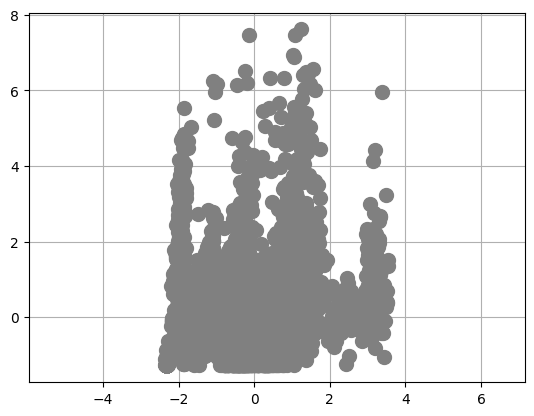

In [259]:
plt.plot(train.iloc[:,1], train.iloc[:,2],'o', markersize=10, color=[0.5,0.5,0.5])
plt.grid("off")
plt.axis("equal")

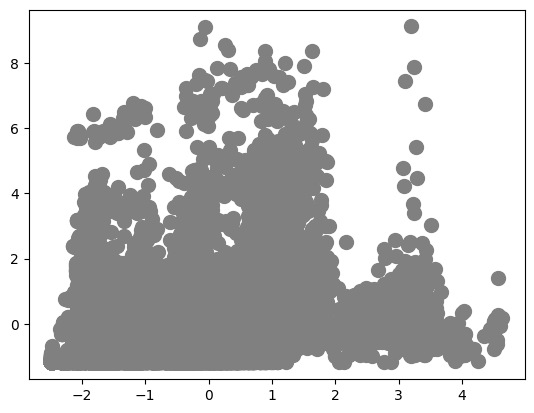

In [277]:
plt.plot(test.iloc[:,1], test.iloc[:,2],'o', markersize=10, color=[0.5,0.5,0.5])

## Isolation Forest
- uses tree-based approach to isolate anomalies after modelling itself on "normal" data in an unsupervised fashion.
https://www.projectpro.io/article/anomaly-detection-using-machine-learning-in-python-with-example/555#mcetoc_1fqgmt45ri


# Train Data 

In [283]:
to_model_columns=train.columns[0:6]
train.reset_index(inplace=True)
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.0), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(train[to_model_columns])
pred = clf.predict(train[to_model_columns])
score = clf.decision_function(train[to_model_columns])
train['anomaly']=pred
train['score'] = score
outliers=train.loc[train['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(train['anomaly'].value_counts())

SyntaxError: invalid syntax (408513319.py, line 4)

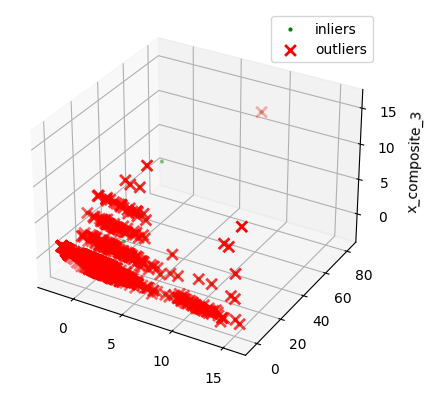

In [262]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(train[to_model_columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

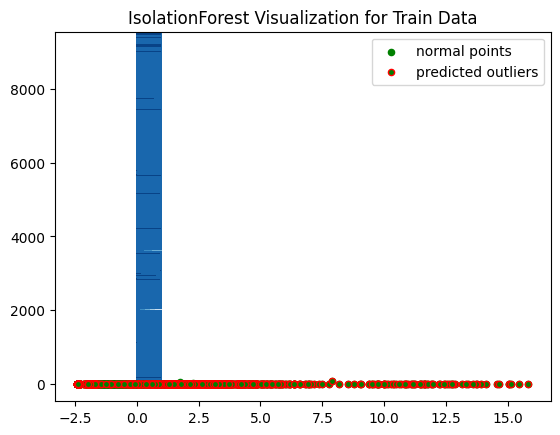

In [264]:
pca = PCA(2)
pca.fit(train[to_model_columns])
res=pd.DataFrame(pca.transform(train[to_model_columns]))
Z = np.array(res)
plt.title("IsolationForest Visualization for Train Data")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

# Test Data

In [265]:
to_model_columns=test.columns[0:6]
test.reset_index(inplace=True)
pred = clf.predict(test[to_model_columns])
score = clf.decision_function(test[to_model_columns])
test['score'] = score
test['anomaly']=pred
outliers=test.loc[test['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(test['anomaly'].value_counts())

 1    32529
-1     7398
Name: anomaly, dtype: int64


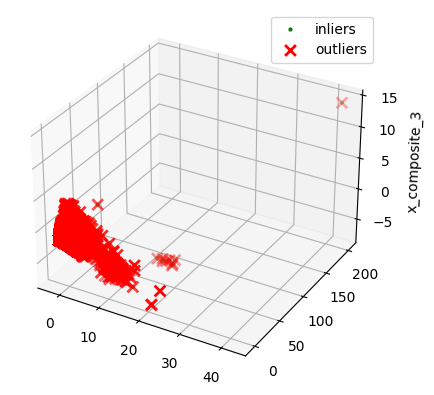

In [266]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(test[to_model_columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

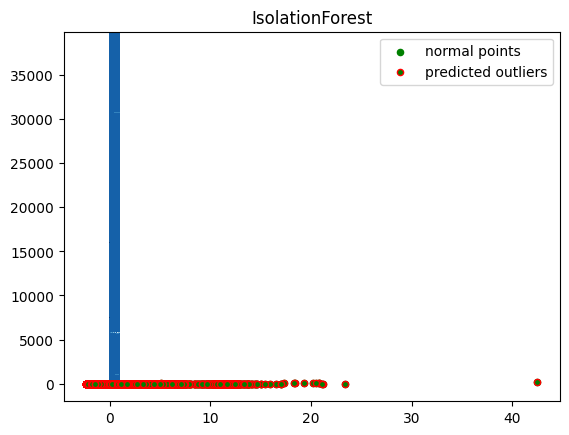

In [267]:
pca = PCA(2)
pca.fit(test[to_model_columns])
res=pd.DataFrame(pca.transform(test[to_model_columns]))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

## Calculation of Confusion Matrix 

As we have access to the labels we can evaluate the algorithm with the labels

In [268]:
# Caluclation of Confusion Matrix 
y_true = test[test['exploit']== True]
# encode boolean values
test["exploit"] = test["exploit"].astype(int) # false = 0, true = 1
train["exploit"] = train["exploit"].astype(int)
y_true = test['exploit']
y_pred = test['anomaly'] # -1 = anomaly, 1 = normal
y_pred = y_pred.mask(y_pred == 1, 0) # now 0 = normal
y_pred =  y_pred.mask(y_pred == -1, 1) # now 1 = anomaly
y_true = pd.Series(y_true.values, name='Actual')
y_pred = pd.Series(y_pred.values, name='Predicted')
df_confusion = pd.crosstab(y_true, y_pred)
df_confusion

Predicted,0,1
Actual,,
0,30092,4529
1,2437,2869


In [269]:
df_confusion = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,0,1,All
Actual,,,
0,30092,4529,34621
1,2437,2869,5306
All,32529,7398,39927


In [270]:
def classify_anomalies(df, feature):
    df['feature_name'] = feature
  
    df.sort_values(by='timestamp', ascending=False)

    #    #Categorise anomalies as 0-no anomaly, 1- low anomaly , 2 - high anomaly
    df['anomaly'].loc[df['anomaly'] == 1] = 0
    df['anomaly'].loc[df['anomaly'] == -1] = 2
    df['anomaly_class'] = df['anomaly']
    max_anomaly_score = df['score'].loc[df['anomaly_class'] == 2].max()
    print('Maximaler Anomaly Score for {0}: '.format(feature)) 
    print(max_anomaly_score)
    medium_percentile = df['score'].quantile(0.24)
    print('Medium Percentile for {0}: '.format(feature)) 
    print(medium_percentile)
    df['anomaly_class'].loc[(df['score'] > max_anomaly_score) & (df['score'] <= medium_percentile)] = 1
    return df

In [271]:
for i in range(1, len(train[to_model_columns].columns)-1):
    clf.fit(train.iloc[:,i:i+1])
    pred = clf.predict(train.iloc[:,i:i+1])
    test_df=pd.DataFrame()
    test_df['timestamp']=train['timestamp']
    test_df['score']=clf.decision_function(train.iloc[:,i:i+1])
    #print(test_df)
    test_df['actuals']=train.iloc[:,i:i+1]
    test_df['anomaly']=pred
    #Get the indexes of outliers in order to compare the metrics     with use case anomalies if required
    outliers=test_df.loc[test_df['anomaly']==-1]
    outlier_index=list(outliers.index)
    test_df=classify_anomalies(test_df,train.columns[i])



Maximaler Anomaly Score for cpu_usage: 
-0.00032737426464424235
Medium Percentile for cpu_usage: 
0.0398394762056892
Maximaler Anomaly Score for memory_usage: 
-4.2745794586185326e-05
Medium Percentile for memory_usage: 
0.08849829778357926
Maximaler Anomaly Score for network_received: 
-3.780417568544081e-06
Medium Percentile for network_received: 
0.025841304719194266
Maximaler Anomaly Score for network_send: 
-0.0002524879599878904
Medium Percentile for network_send: 
0.02246819578117319


In [272]:
test_df

,timestamp,score,actuals,anomaly,feature_name,anomaly_class
0,2021-09-09 23:21:47.309,0.071104,0.068812,0,network_send,0
1,2021-09-09 23:21:48.319,0.112296,-0.170922,0,network_send,0
2,2021-09-09 23:21:49.336,0.084613,-0.180346,0,network_send,0
3,2021-09-09 23:21:50.345,0.104049,-0.093361,0,network_send,0
4,2021-09-09 23:21:51.364,-0.051497,0.681183,2,network_send,2
...,...,...,...,...,...,...
9559,2021-09-15 12:32:18.755,0.019642,-0.567153,0,network_send,1
9560,2021-09-15 12:32:19.758,0.019642,-0.567153,0,network_send,1
9561,2021-09-15 12:32:20.762,0.019642,-0.567153,0,network_send,1
9562,2021-09-15 12:32:21.766,0.019642,-0.567153,0,network_send,1


In [273]:
for i in range(1, len(test[to_model_columns].columns)-1):
    clf.fit(train.iloc[:,i:i+1])
    pred = clf.predict(test.iloc[:,i:i+1])
    test_df=pd.DataFrame()
    test_df['timestamp']=test['timestamp']
    test_df['score']=clf.decision_function(test.iloc[:,i:i+1])
    #print(test_df)
    test_df['actuals']=test.iloc[:,i:i+1]
    test_df['anomaly']=pred
    #Get the indexes of outliers in order to compare the metrics     with use case anomalies if required
    outliers=test_df.loc[test_df['anomaly']==-1]
    outlier_index=list(outliers.index)
    test_df=classify_anomalies(test_df,test.columns[i])

Maximaler Anomaly Score for cpu_usage: 
-0.0004541836267150101
Medium Percentile for cpu_usage: 
0.03758108929485086
Maximaler Anomaly Score for memory_usage: 
-4.2745794586185326e-05
Medium Percentile for memory_usage: 
0.07450422493890674
Maximaler Anomaly Score for network_received: 
-3.780417568544081e-06
Medium Percentile for network_received: 
0.004018167664257777
Maximaler Anomaly Score for network_send: 
-0.0001812090515231901
Medium Percentile for network_send: 
-0.0029379016448188855


In [203]:
test_df[test_df['anomaly_class']==0]

,timestamp,score,actuals,anomaly,feature_name,anomaly_class
2,2021-12-21 16:29:21.802,0.108707,13851,0,network_send,0
5,2021-12-21 16:29:24.824,0.106246,11435,0,network_send,0
17,2021-12-21 16:29:36.907,0.031098,2405,0,network_send,0
20,2021-12-21 16:29:39.931,0.023216,2450,0,network_send,0
37,2021-12-21 16:29:57.047,0.079938,15306,0,network_send,0
...,...,...,...,...,...,...
39922,2021-09-09 18:17:40.958,0.108187,7083,0,network_send,0
39923,2021-09-09 18:17:41.962,0.084184,4742,0,network_send,0
39924,2021-09-09 18:17:42.965,0.034398,2317,0,network_send,0
39925,2021-09-09 18:17:43.970,0.076167,14793,0,network_send,0


In [274]:
test[test['timestamp']=='2021-12-21 16:29:19.790']

,timestamp,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written,exploit,timestamp_container_ready,timestamp_trick_admin,timestamp_execute_reverse_shell,timestamp_warmup_end,container_name,dates,times,score,anomaly
0,2021-12-21 16:29:19.790,-1.257017,-2.470057,-0.933793,-0.554823,-0.021601,-0.019154,1,2021-12-21 16:29:16.769860,2021-12-21 16:29:56.661277,2021-12-21 16:29:57.220510,2021-12-21 16:29:19.773270,abundant_knuth_3979,2021-12-21,16:29:19.790000,-0.048909,-1
